<a href="https://colab.research.google.com/github/Rahuldilla/Space_Debrics_detection/blob/main/Space_Debrics_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jul 27 17:18:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IiWwBbMcgdSaZOwpyX4J")
project = rf.workspace("nikita-grigorev").project("kosmo_v1-ky8eq")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov11")



In [ ]:
print(dataset.location)


/content/Kosmo_v1-3


In [ ]:
!ls /content/Kosmo_v1-3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'CertificateOfCompletion_Become a Data Scientist (1).pdf'
'CertificateOfCompletion_Become a Data Scientist.pdf'
'CertificateOfCompletion_Understanding Cloud Fundamentals (1).pdf'
'CertificateOfCompletion_Understanding Cloud Fundamentals.pdf'
 Classroom
'Colab Notebooks'
'Coursera DGZREYJ64H5W.pdf'
'Coursera MHDLDTN6YVJ5 (1).pdf'
'Coursera MHDLDTN6YVJ5.pdf'
'Coursera PASGV5GMS87F certificate.pdf'
 cpp
 finalresume2.pdf
 finalresume.pdf
 gen_AI_CV.pdf
'Getting started.pdf'
 kanerika
'latest generic cv (1).pdf'
'latest generic cv.pdf'
 mlresume.pdf
'New Microsoft Word Document.pdf'
 Rahuldilla_12223989
'RAHUL DILLA (2).pdf (1) (1).pdf.pdf'
'RAHUL DILLA (2).pdf (1).pdf (1).pdf'
'RAHUL DILLA (2).pdf (1).pdf.pdf'
'RahuldillaGantt Chart.pdf'
 resume.pdf
 Saiyaara.2025.720p.HDTC.Hindi.ORG.x264.mkv
 Snapchat-1015875007.mp4
'Social Networks.pdf'
 udemydsa.pdf
'Video cv'
 VN20250709_101049.mp4


In [6]:
dataset.location

'/content/Kosmo_v1-3'

In [ ]:
!unzip "/content/Kosmo_v1-3" -d /content/


unzip:  cannot find or open /content/Kosmo_v1-3, /content/Kosmo_v1-3.zip or /content/Kosmo_v1-3.ZIP.


In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=60 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 108MB/s]
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Kosmo_v1-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

In [10]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.0a76ff7753181abd3e76753a73f6ec3e.jpg: 416x640 1 satellite, 45.5ms
image 2/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.32bd38d9cd191a56efa2be75580a1195.jpg: 416x640 1 satellite, 11.6ms
image 3/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.3669b029544f2d9e77f5c3995bc2fc65.jpg: 416x640 1 satellite, 8.3ms
image 4/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.4cf4be77f8fd21de0857fd8db30e1beb.jpg: 416x640 1 satellite, 7.9ms
image 5/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.a19d881a9914d0964872dbdf79799a53.jpg: 416x640 1 satellite, 8.3ms
image 6/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.dafc8ff347cb19fdd40d3d783a3d06b5.jpg: 416x640 1 satellite, 8.0ms
image 7/55 /content/Kosmo_v1-3/test/images/21_jpg.rf.e53b7226002bf94e45c8227a5a1693af.jpg: 416x640 1 satellite, 7.8ms
image

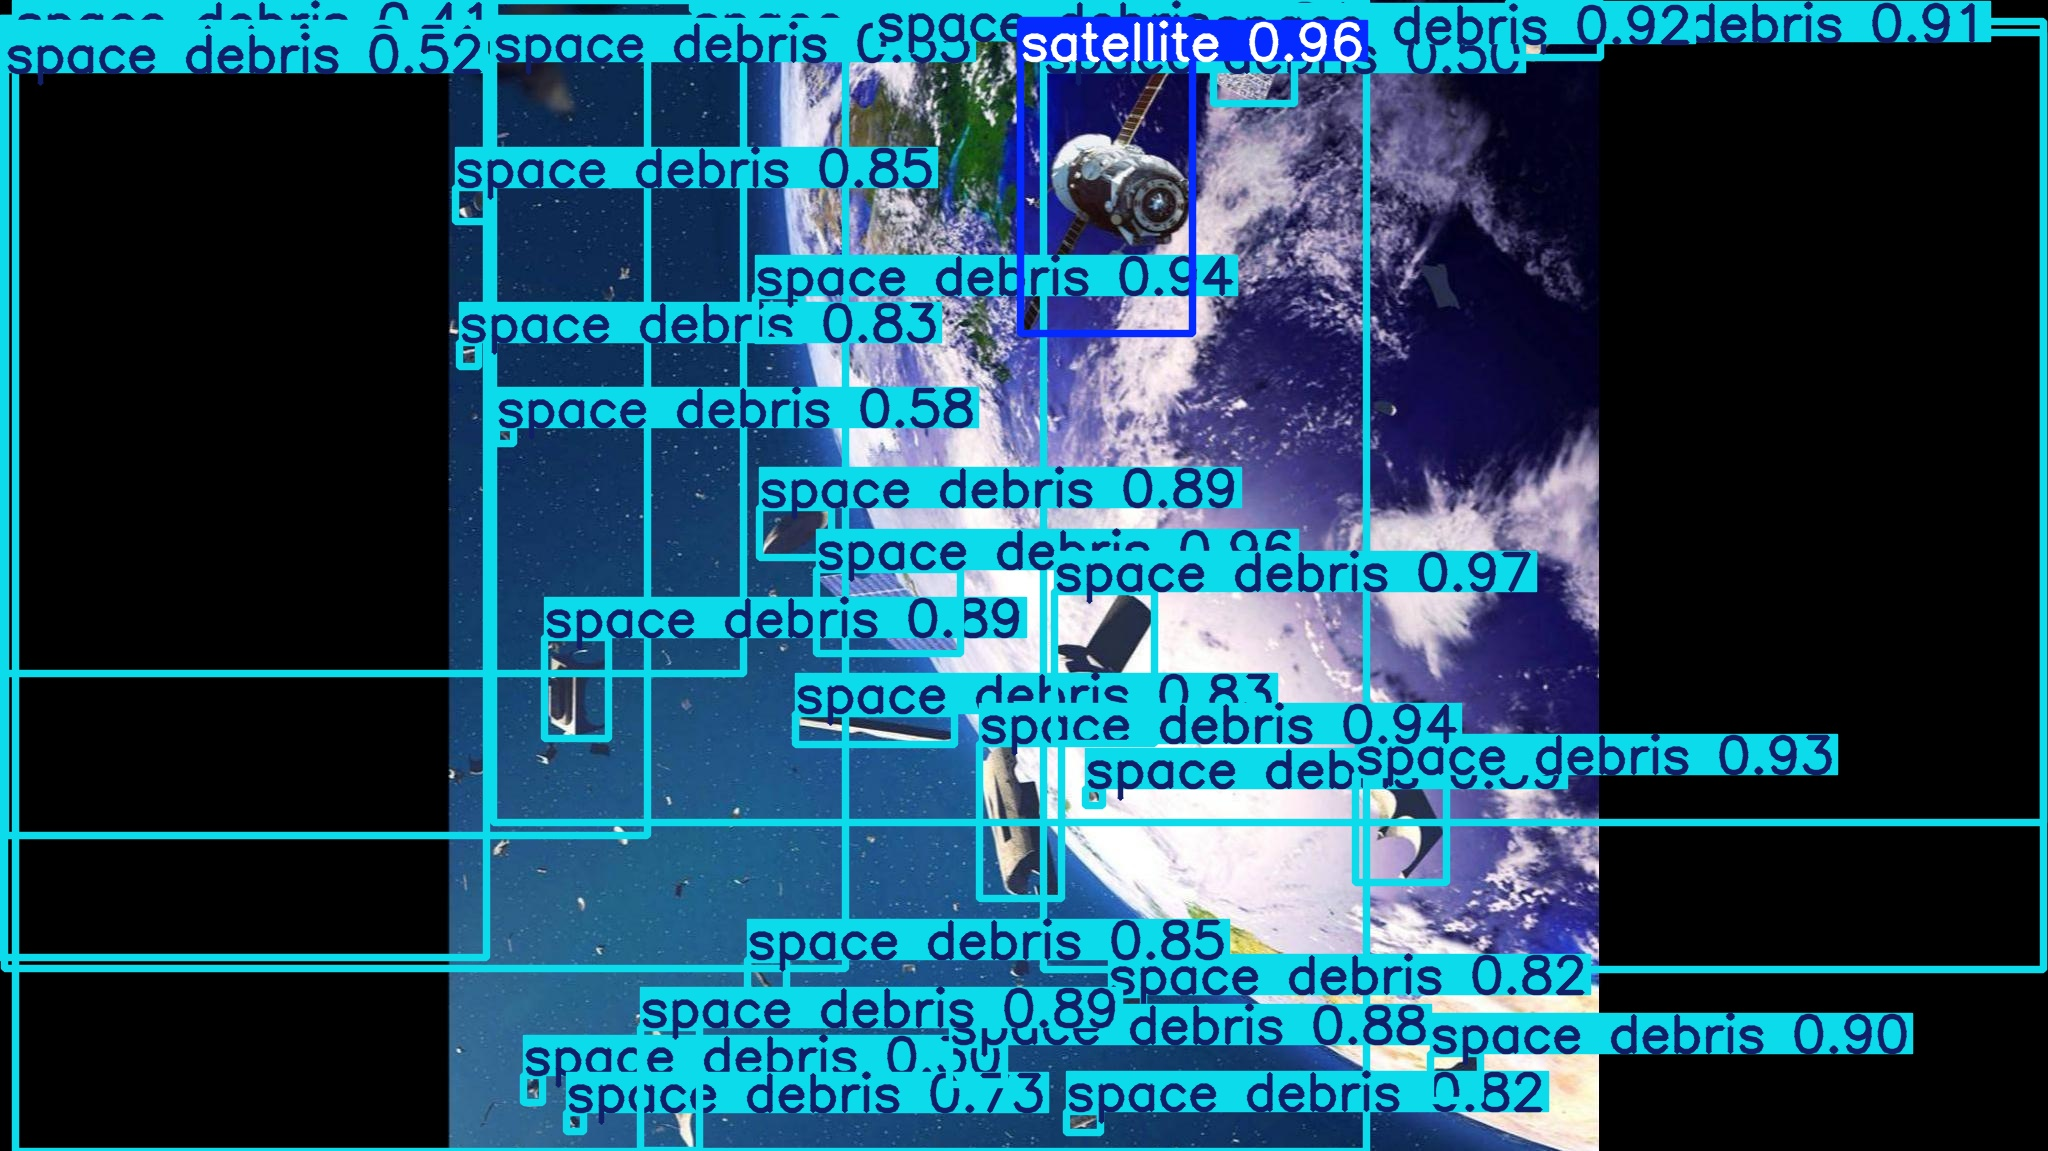

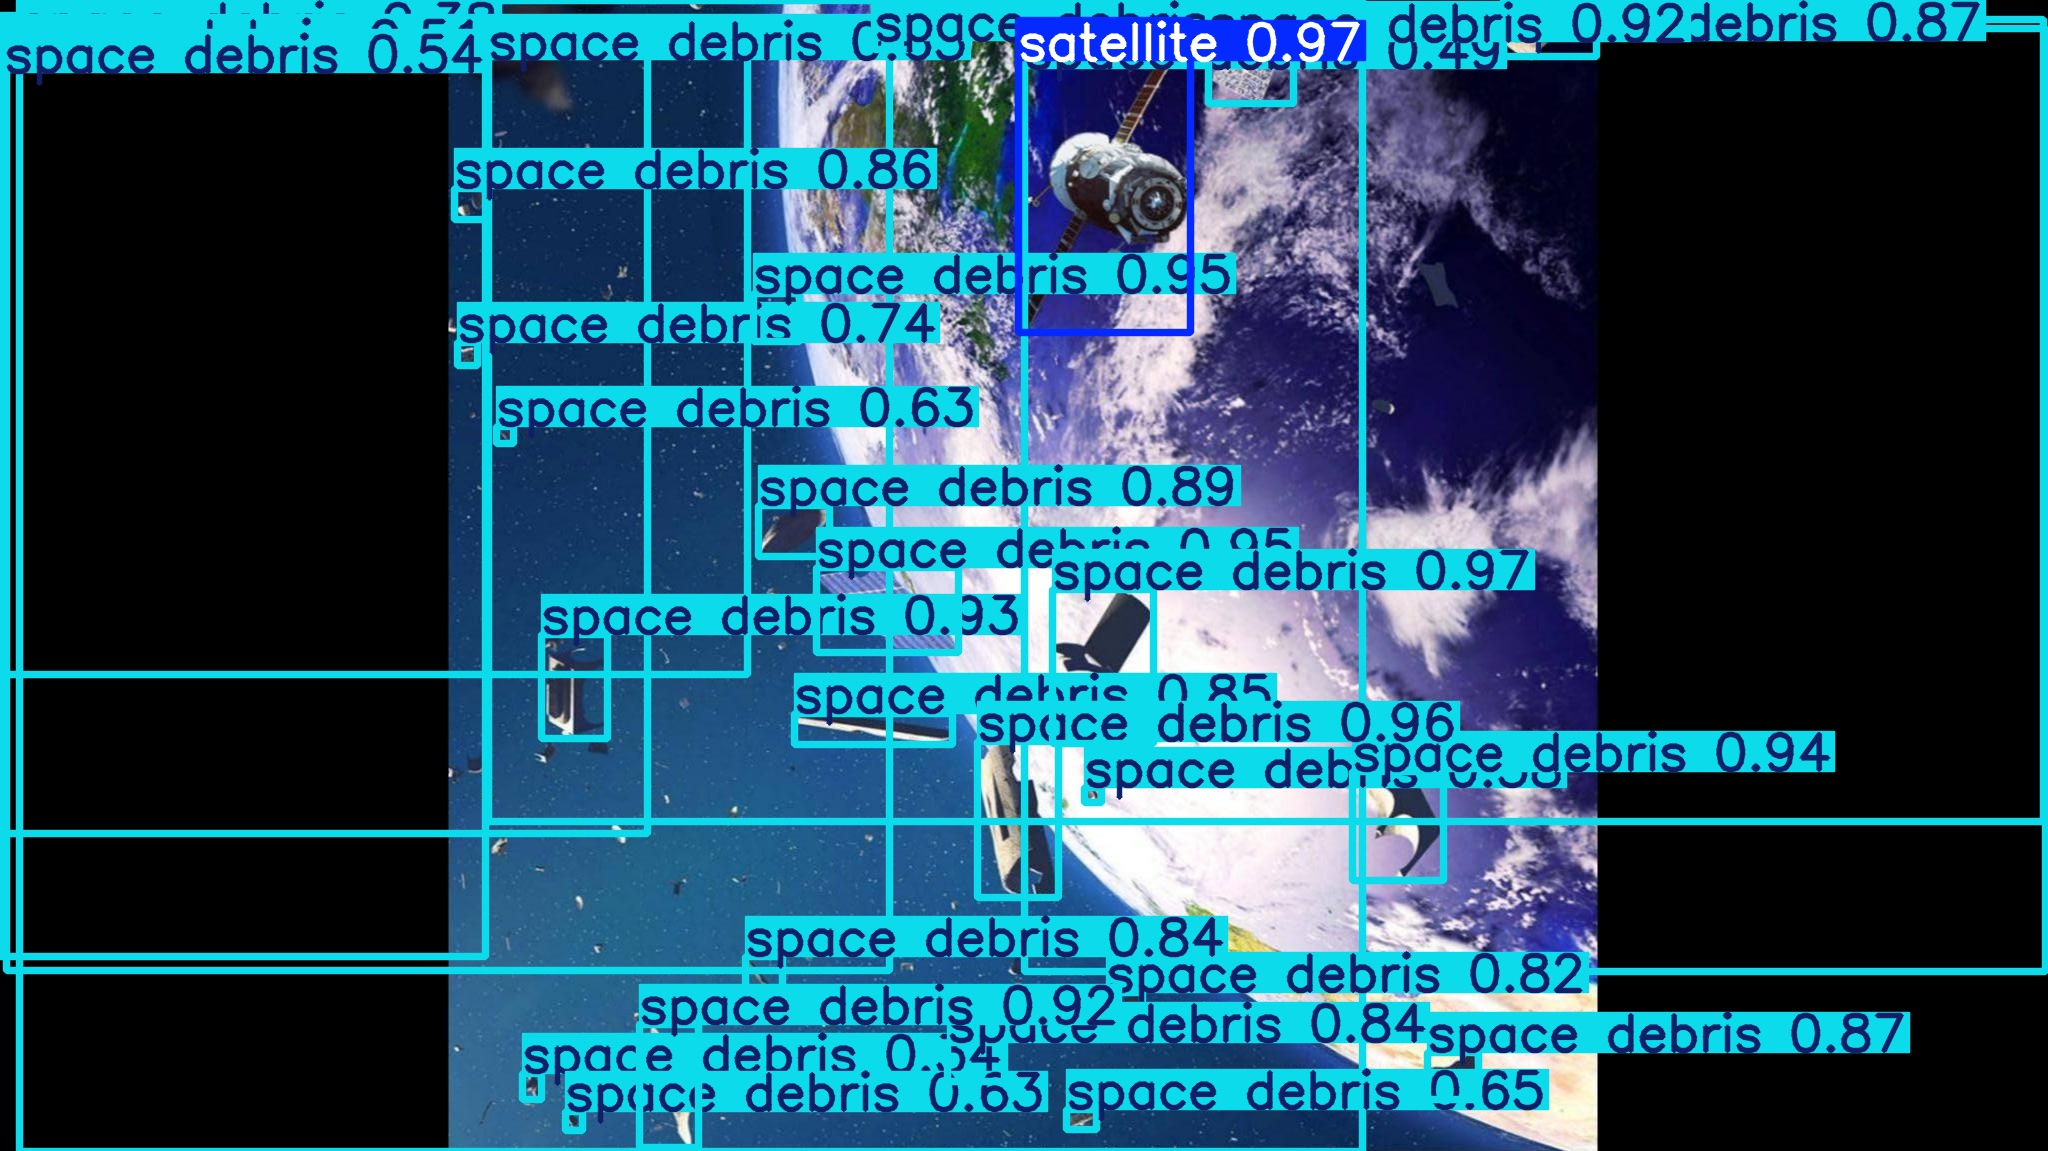

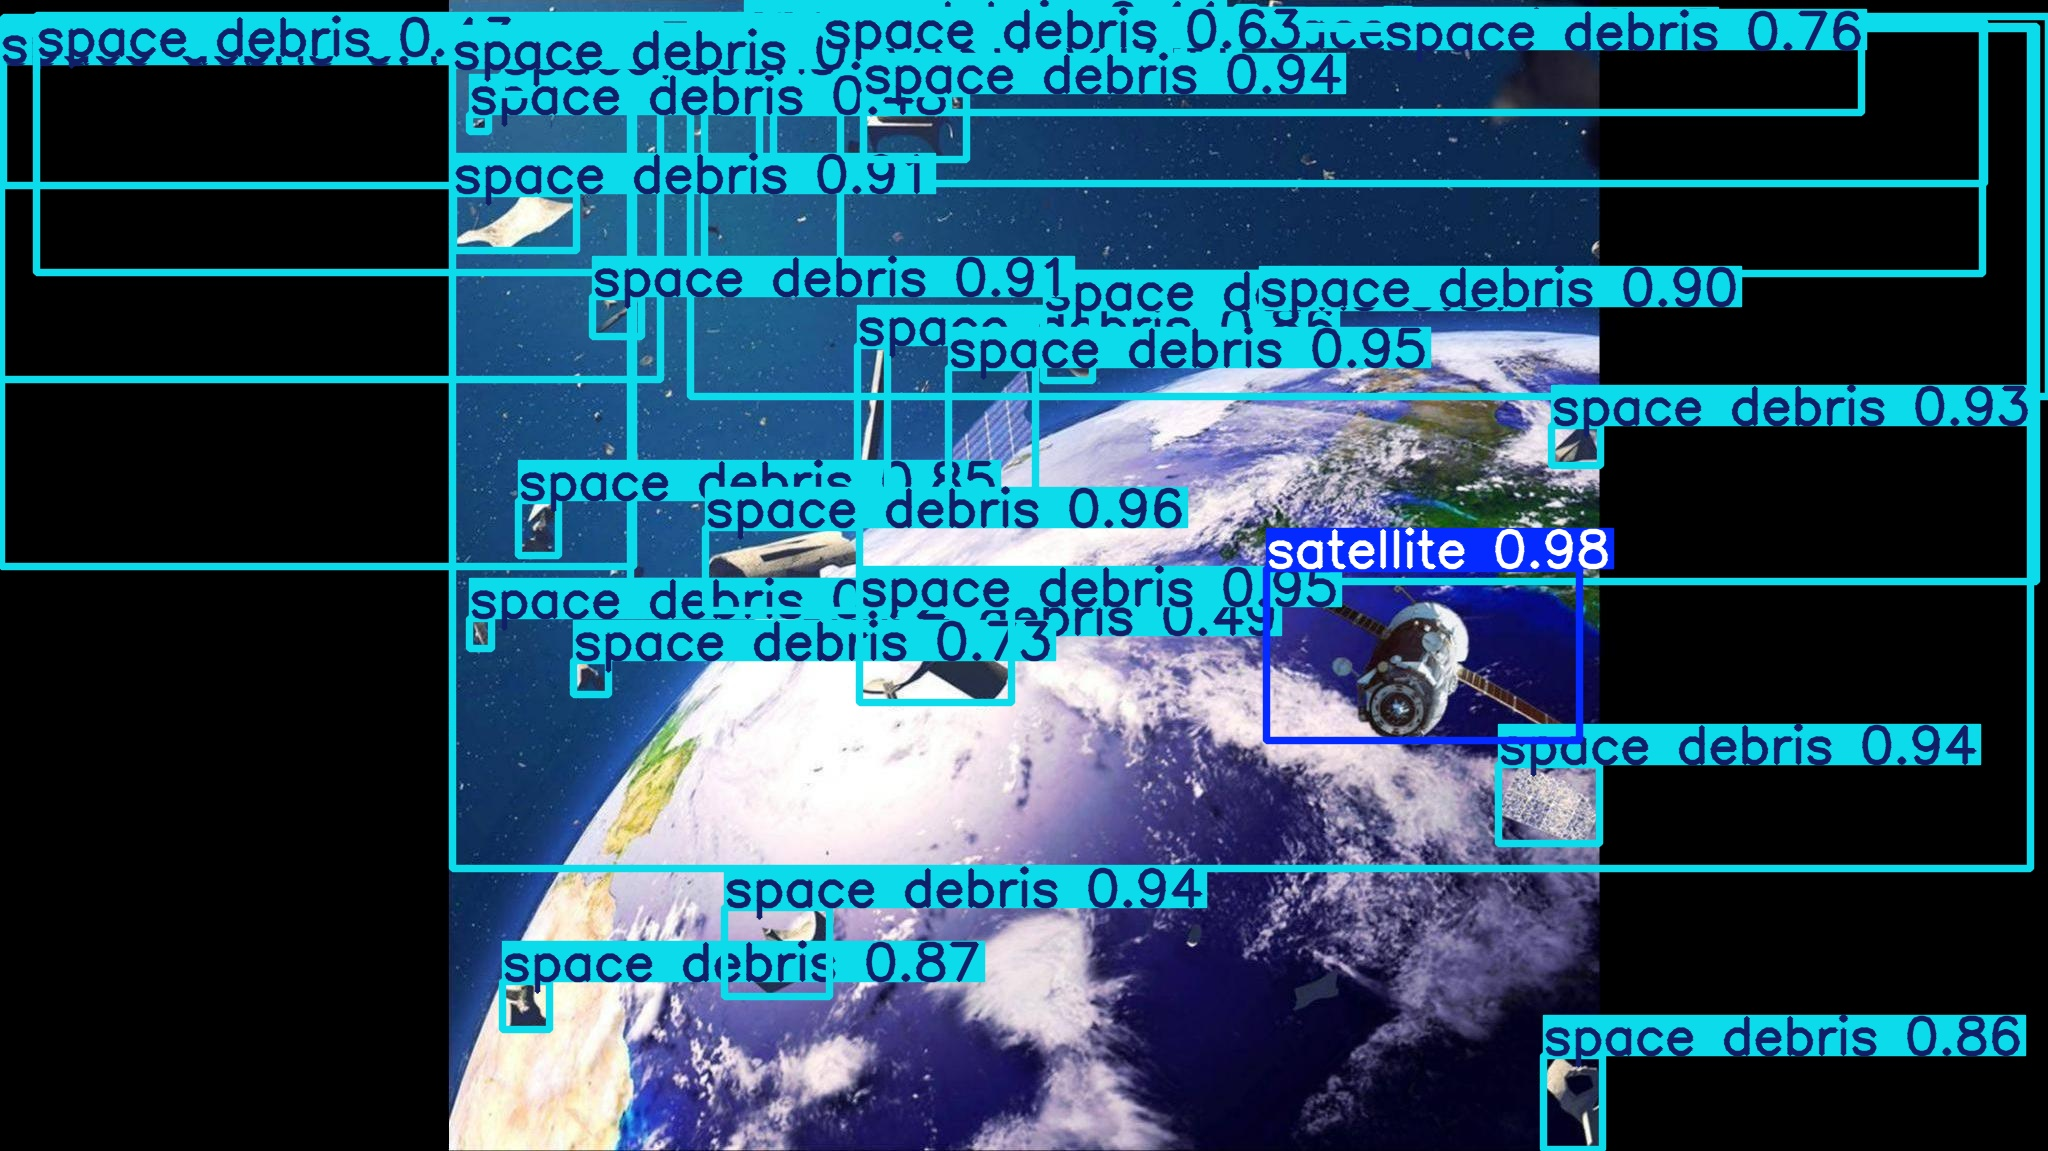

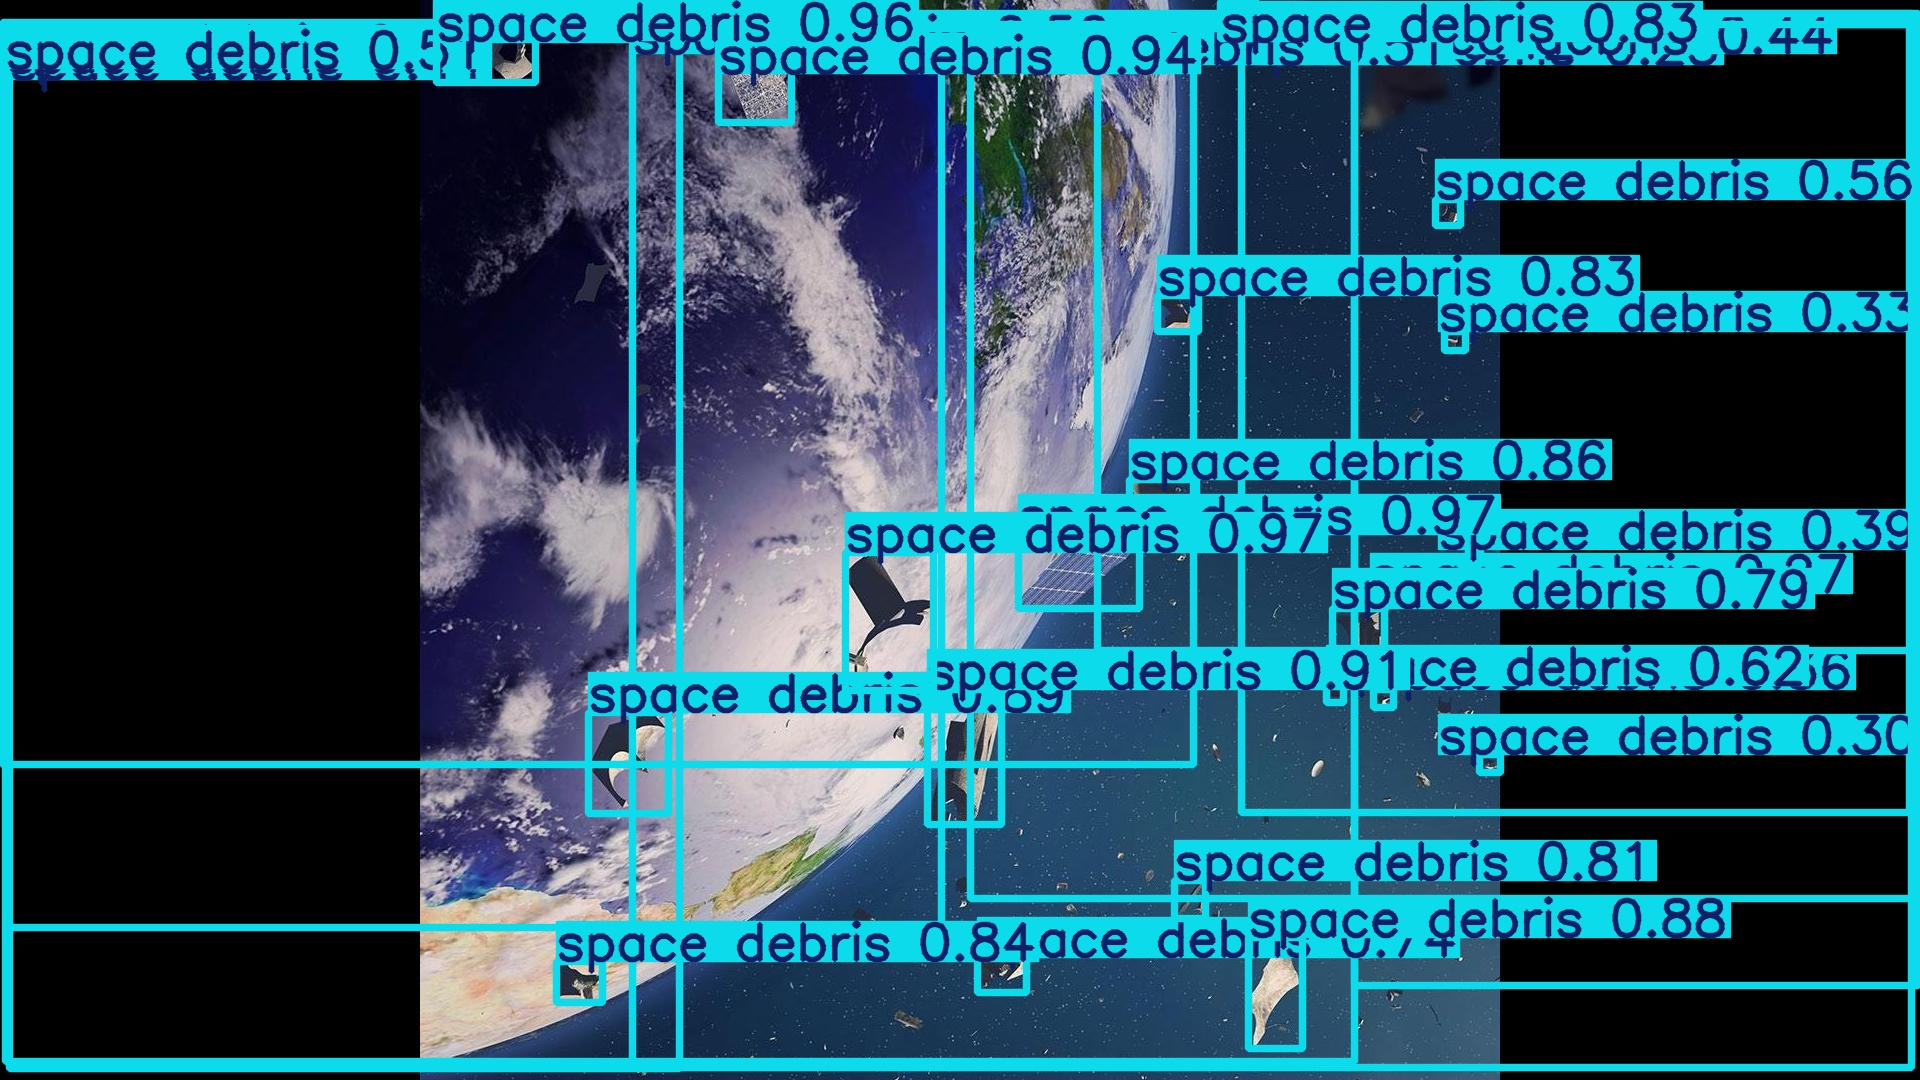

In [11]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")
